## KNN Regression from Scratch

by : Pradeeshkumar U , date : 03/05/2025

Importing Required Dataset (except the Scikit learn packages)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
from sklearn import datasets

data = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names)
data['target'] = datasets.load_iris().target
col = data['petal length (cm)']
data.drop(columns=['petal length (cm)'],inplace=True)
data['petal length (cm)'] = col

Data Analysis

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal width (cm),target,petal length (cm)
0,5.1,3.5,0.2,0,1.4
1,4.9,3.0,0.2,0,1.4
2,4.7,3.2,0.2,0,1.3
3,4.6,3.1,0.2,0,1.5
4,5.0,3.6,0.2,0,1.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal width (cm)   150 non-null    float64
 3   target             150 non-null    int64  
 4   petal length (cm)  150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal width (cm),target,petal length (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,1.199333,1.000000,3.758000
std,0.828066,0.435866,0.762238,0.819232,1.765298
min,4.300000,2.000000,0.100000,0.000000,1.000000
25%,5.100000,2.800000,0.300000,0.000000,1.600000
50%,5.800000,3.000000,1.300000,1.000000,4.350000
75%,6.400000,3.300000,1.800000,2.000000,5.100000
max,7.900000,4.400000,2.500000,2.000000,6.900000


In [7]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal width (cm)     0
target               0
petal length (cm)    0
dtype: int64

In [8]:
data = data.fillna(data.mean())

Data Visualisation

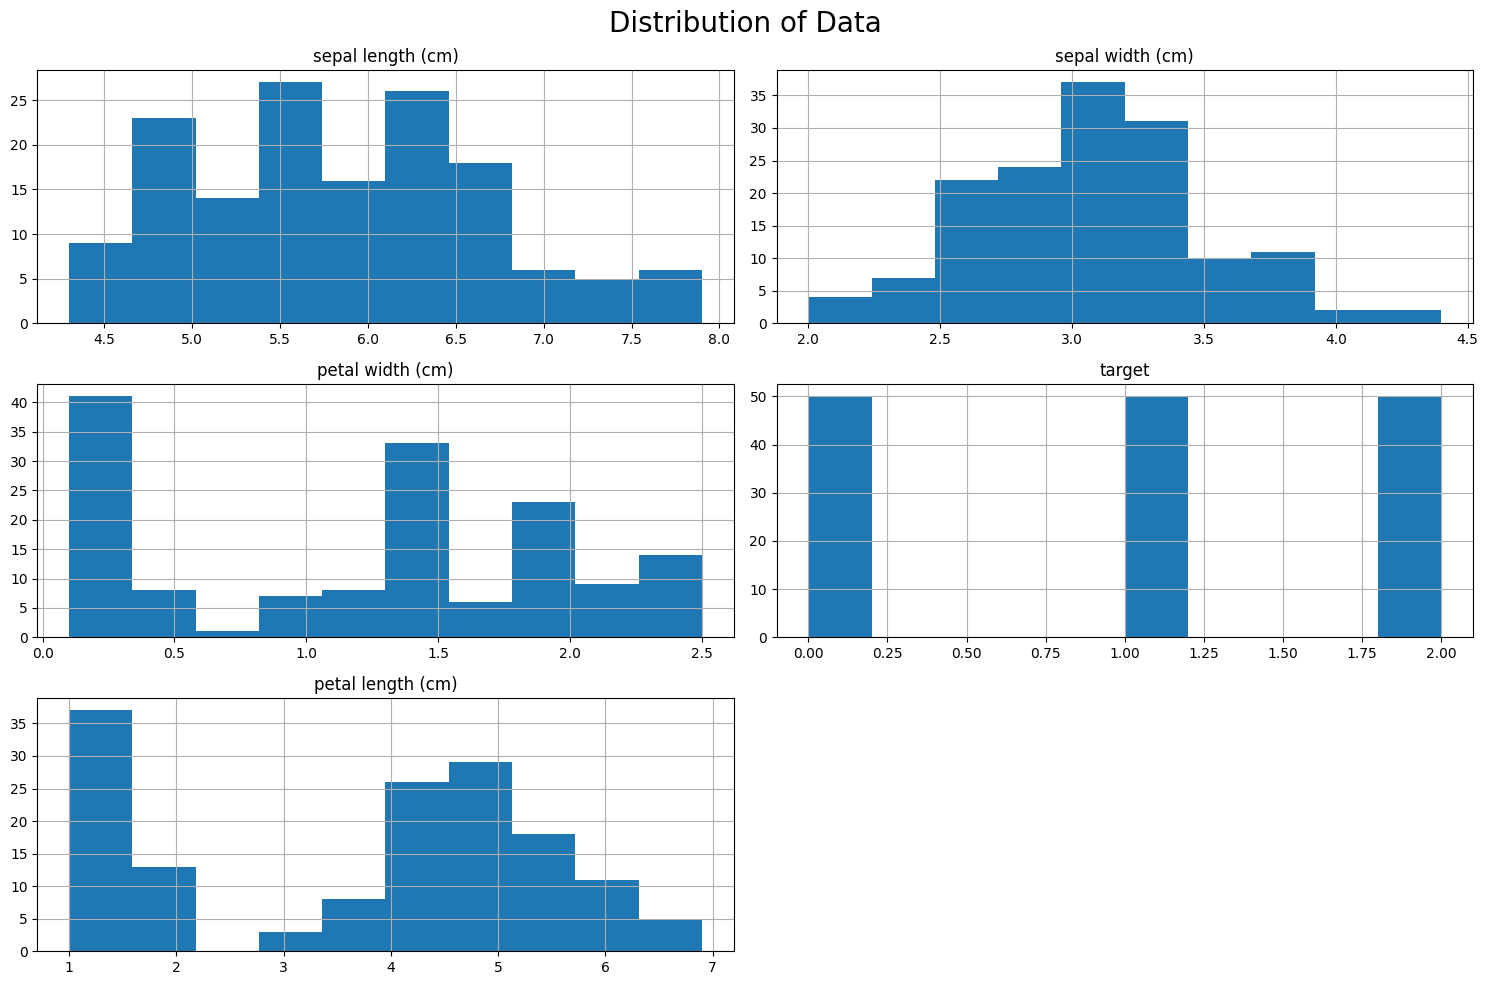

In [9]:
data.hist(figsize=(15,10))
plt.suptitle('Distribution of Data', fontsize=20)
plt.tight_layout()
plt.show()

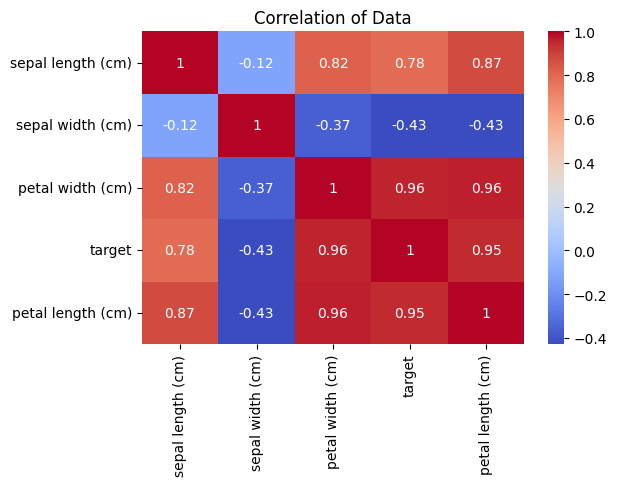

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.title('Correlation of Data')
plt.show()

Splitting the Data into Train and Test sets

In [11]:
def TrainTestSplit(data,test_size=0.2):
    train = data.sample(frac=1-test_size,random_state=42)
    test = data.drop(train.index)
    tar = data.columns[-1]
    return train.drop(columns=[tar]),test.drop(columns=[tar]),train[tar],test[tar]

In [12]:
Xtrain,Xtest,ytrain,ytest = TrainTestSplit(data)

Scaling the data to make the KNN work faster

In [13]:
def StandardScaler(c,mean,std):
    return (c-mean)/std

In [14]:
Xtrain_scaled = StandardScaler(Xtrain,Xtrain.mean(),Xtrain.std())
Xtest_scaled = StandardScaler(Xtest,Xtrain.mean(),Xtrain.std())

Creating the KNN Regression Model

In [15]:
class KNN_Regresser:
    def __init__(self,k=1):
        self.k=k
        
    def fit(self,X,y):
        self.X_train = X.values
        self.y_train = y.values
        
    def _predict(self,x):
        dist = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_i = np.argsort(dist)[:self.k]
        val = [self.y_train[i] for i in k_i]
        return float(np.round(np.mean(val),1))
    
    def predict(self,X):
        pred = [self._predict(x) for x in X.values]
        return pred

R^2 Score function to get Accuracy score of the model

In [16]:
def r2_score(y_true,y_pred):
    y_true_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_true_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return np.round(1-(ss_residual/ss_total),2)

Function to Fit and make Predictions with the model

In [17]:
model = KNN_Regresser(k=int(np.sqrt(len(Xtrain))))
model.fit(Xtrain_scaled,ytrain)

ypred_train = model.predict(Xtrain_scaled)

ypred = model.predict(Xtest_scaled)

In [18]:
print('Accuracy Score of Training Data',r2_score(ytrain.values,ypred_train))

Accuracy Score of Training Data 0.98


In [19]:
print('Accuracy Score of Testing Data',r2_score(ytest.values,ypred))

Accuracy Score of Testing Data 0.97


Since both the Scores are almost equal and are actually Great ,The model is performing well